In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel("../../Visualization_data/Figure 5/heatmap_table_for_plotting_HAQER.xlsx")

[5, 6, 4, 0, 1, 3, 2, 7, 8]


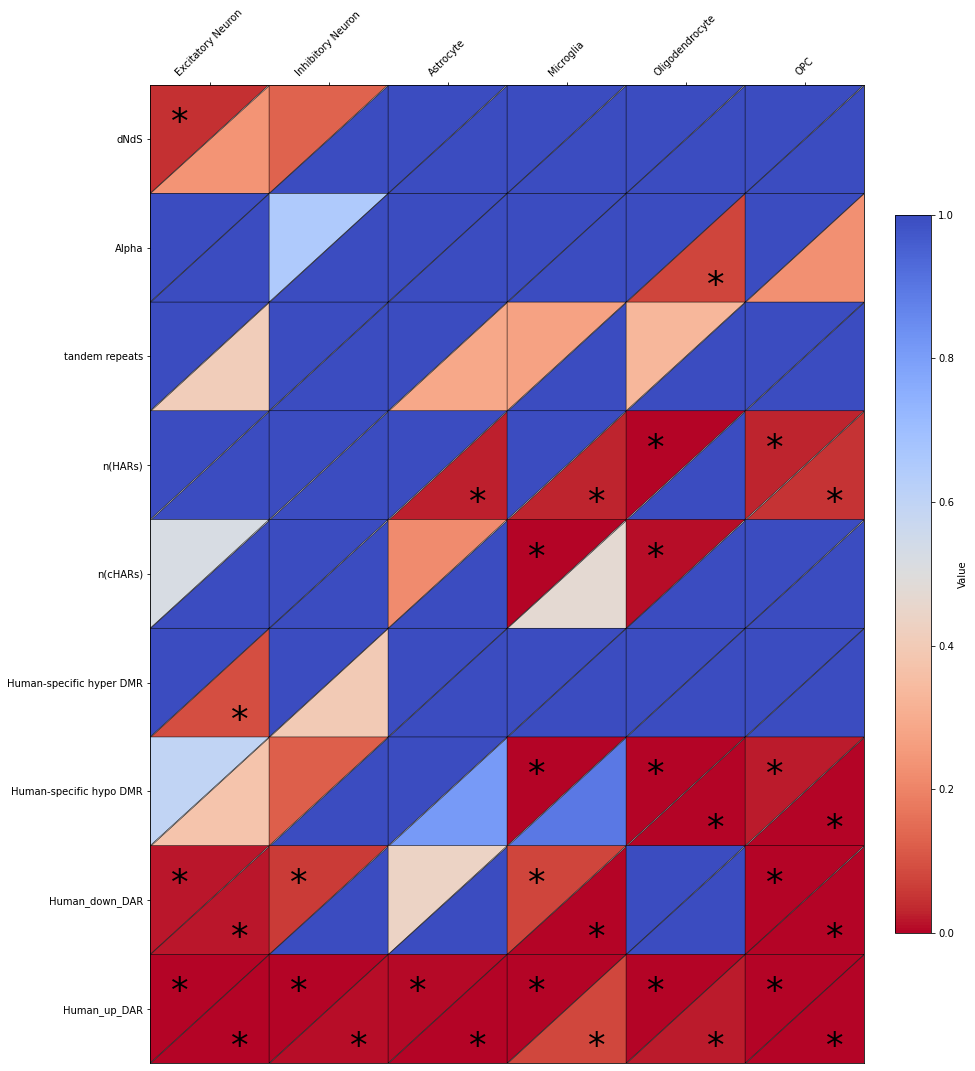

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from scipy.cluster.hierarchy import linkage, dendrogram

def create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order, figsize=(14, 18)):
    # Transpose the data back to original orientation for clustering on rows
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    nrows, ncols = data_upper.shape  # Get new dimensions after transposing
    
    # Perform hierarchical clustering on rows
    row_linkage = linkage(data_upper, method='average')
    
    # Create a dendrogram and get the order of rows
    row_dendro = dendrogram(row_linkage, no_plot=True)
    
    row_order = row_dendro['leaves']
    row_order = [5, 6, 4, 0, 1, 3, 2, 7, 8]
    print(row_order)
    
    # Reorder data and row names based on clustering
    data_upper = data_upper[row_order, :]
    data_lower = data_lower[row_order, :]
    row_names = np.array(row_names)[row_order]
    
    # Reorder data and row names based on the specified row order
    data_upper = data_upper[:, specified_row_order]
    data_lower = data_lower[:, specified_row_order]
    col_names = np.array(col_names)[specified_row_order]
    
    # Transpose the data back to match the heatmap's original row-column orientation
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    fig, ax = plt.subplots(figsize=figsize)
    
    norm = Normalize(vmin=0, vmax=1)  # Normalize the color range from 0 to 1
    
    for i in range(nrows):
        for j in range(ncols):
            # Upper triangle
            ax.add_patch(patches.Polygon([[j, i], [j+1, i], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_upper[j, i]))))
            
            if data_upper[j, i] < 0.1:
                ax.text(j + 0.25, i + 0.35, '*', ha='center', va='center', color='black', fontsize=35)
            
            # Lower triangle
            ax.add_patch(patches.Polygon([[j+1, i], [j+1, i+1], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_lower[j, i]))))
            
            if data_lower[j, i] < 0.1:
                ax.text(j + 0.75, i + 0.85, '*', ha='center', va='center', color='black', fontsize=35)

    
    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_xticks(np.arange(ncols) + 0.5)
    ax.set_yticks(np.arange(nrows) + 0.5)
    ax.set_xticklabels(col_names, rotation=45)
    ax.set_yticklabels(row_names)
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('top')
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm_r, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Value')

    plt.show()

# Example data
data_upper = data[data["Study"] == "Ma"]["p.adj"].to_numpy().reshape(9, 6).transpose()
data_lower = data[data["Study"] == "Caglayan"]["p.adj"].to_numpy().reshape(9, 6).transpose()

col_names = ['Astrocyte', 'Excitatory Neuron', 'Inhibitory Neuron', 'Microglia', 'Oligodendrocyte', "OPC"]
row_names = ['n(HARs)', 'n(cHARs)', 'Human-specific hypo DMR', 'Human-specific hyper DMR', 'tandem repeats', 
             'dNdS', 'Alpha', 'Human_down_DAR', 'Human_up_DAR']

specified_row_order = [1, 2, 0, 3, 4, 5]  # Specified order for the rows

create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order)


[5, 6, 4, 0, 1, 3, 2, 7, 8]


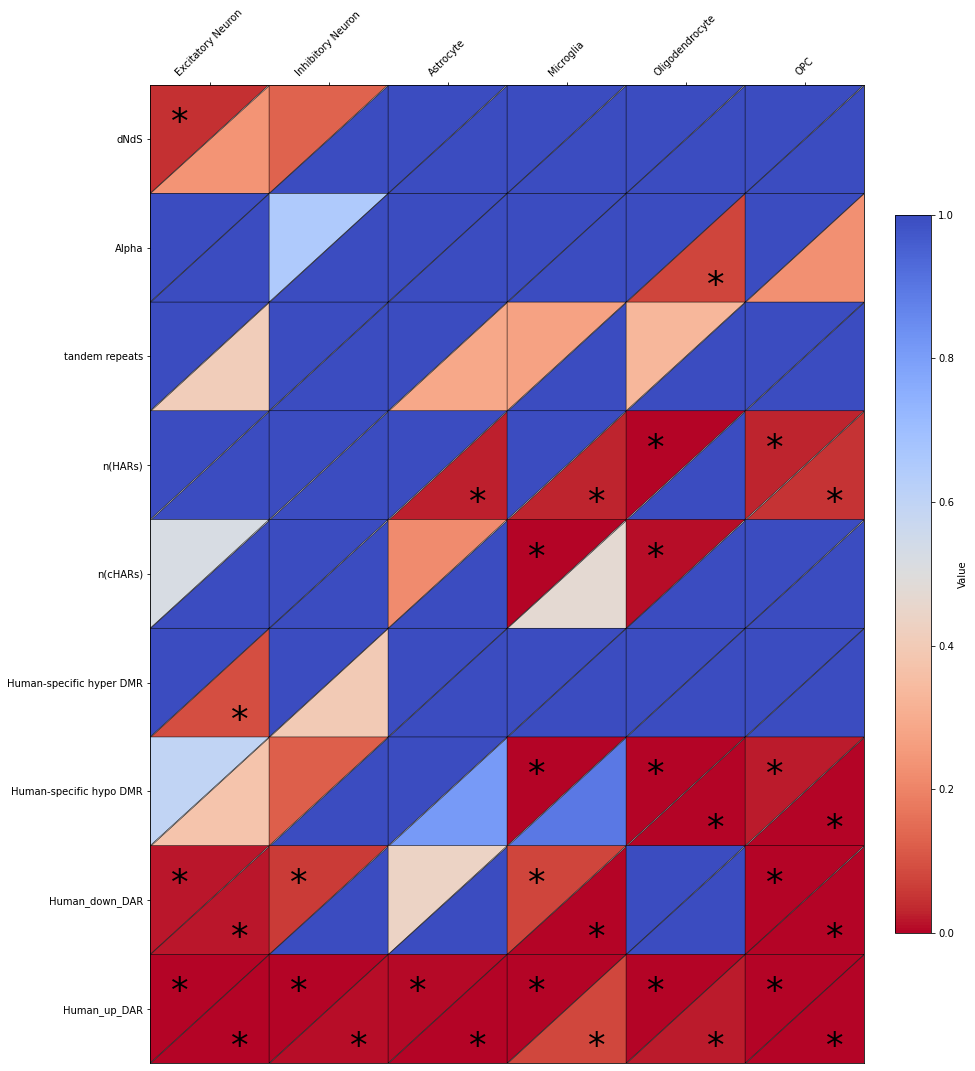

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from scipy.cluster.hierarchy import linkage, dendrogram

def create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order, figsize=(14, 18)):
    # Transpose the data back to original orientation for clustering on rows
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    nrows, ncols = data_upper.shape  # Get new dimensions after transposing
    
    # Perform hierarchical clustering on rows
    row_linkage = linkage(data_upper, method='average')
    
    # Create a dendrogram and get the order of rows
    row_dendro = dendrogram(row_linkage, no_plot=True)
    
    row_order = row_dendro['leaves']
    row_order = [5, 6, 4, 0, 1, 3, 2, 7, 8]
    print(row_order)
    
    # Reorder data and row names based on clustering
    data_upper = data_upper[row_order, :]
    data_lower = data_lower[row_order, :]
    row_names = np.array(row_names)[row_order]
    
    # Reorder data and row names based on the specified row order
    data_upper = data_upper[:, specified_row_order]
    data_lower = data_lower[:, specified_row_order]
    col_names = np.array(col_names)[specified_row_order]
    
    # Transpose the data back to match the heatmap's original row-column orientation
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    fig, ax = plt.subplots(figsize=figsize)
    
    norm = Normalize(vmin=0, vmax=1)  # Normalize the color range from 0 to 1
    
    for i in range(nrows):
        for j in range(ncols):
            # Upper triangle
            ax.add_patch(patches.Polygon([[j, i], [j+1, i], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_upper[j, i]))))
            
            if data_upper[j, i] < 0.1:
                ax.text(j + 0.25, i + 0.35, '*', ha='center', va='center', color='black', fontsize=35)
            
            # Lower triangle
            ax.add_patch(patches.Polygon([[j+1, i], [j+1, i+1], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_lower[j, i]))))
            
            if data_lower[j, i] < 0.1:
                ax.text(j + 0.75, i + 0.85, '*', ha='center', va='center', color='black', fontsize=35)

    
    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_xticks(np.arange(ncols) + 0.5)
    ax.set_yticks(np.arange(nrows) + 0.5)
    ax.set_xticklabels(col_names, rotation=45)
    ax.set_yticklabels(row_names)
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('top')
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm_r, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Value')

    plt.show()

# Example data
data_upper = data[data["Study"] == "Ma"]["p.adj"].to_numpy().reshape(9, 6).transpose()
data_lower = data[data["Study"] == "Caglayan"]["p.adj"].to_numpy().reshape(9, 6).transpose()

col_names = ['Astrocyte', 'Excitatory Neuron', 'Inhibitory Neuron', 'Microglia', 'Oligodendrocyte', "OPC"]
row_names = ['n(HARs)', 'n(cHARs)', 'Human-specific hypo DMR', 'Human-specific hyper DMR', 'tandem repeats', 
             'dNdS', 'Alpha', 'Human_down_DAR', 'Human_up_DAR']

specified_row_order = [1, 2, 0, 3, 4, 5]  # Specified order for the rows

create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order)


[6, 7, 5, 0, 1, 2, 4, 3, 8, 9]


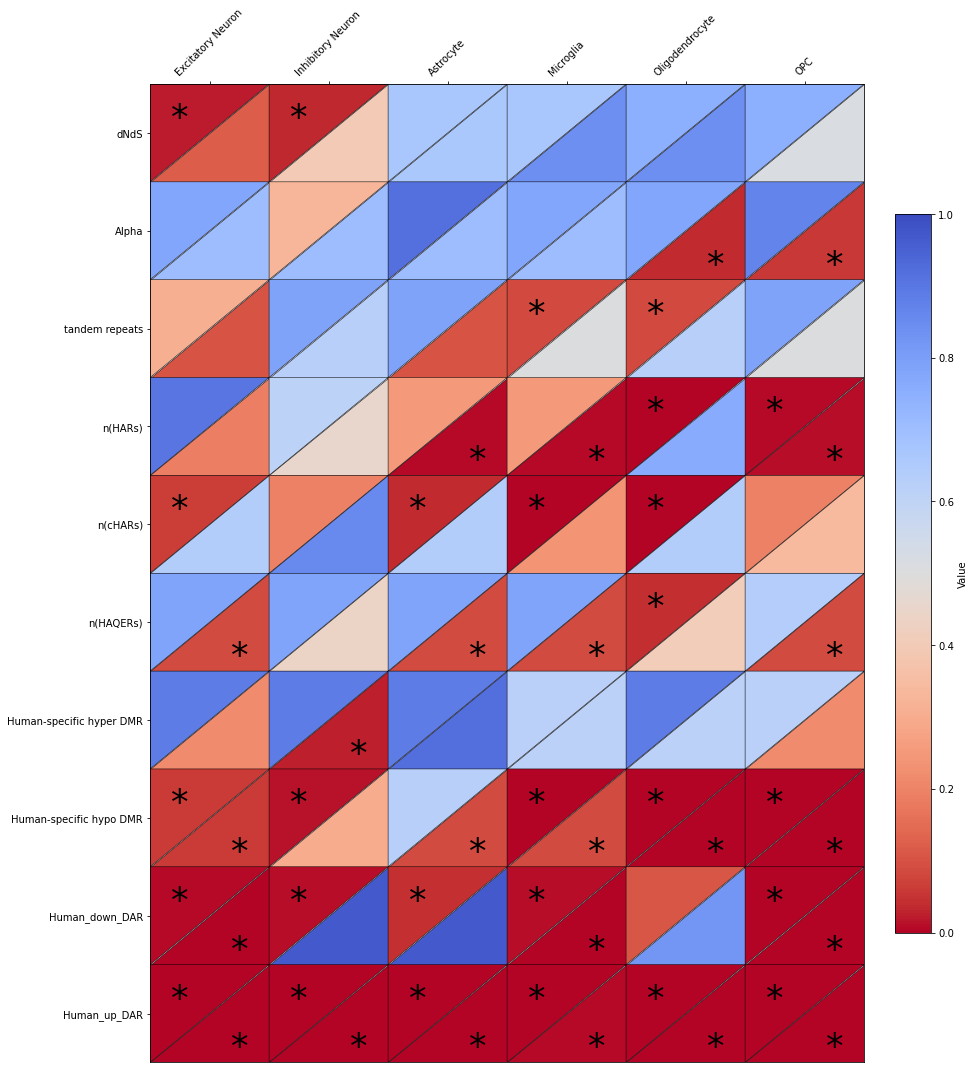

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from scipy.cluster.hierarchy import linkage, dendrogram

def create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order, figsize=(14, 18)):
    # Transpose the data back to original orientation for clustering on rows
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    nrows, ncols = data_upper.shape  # Get new dimensions after transposing
    
    # Perform hierarchical clustering on rows
    row_linkage = linkage(data_upper, method='average')
    
    # Create a dendrogram and get the order of rows
    row_dendro = dendrogram(row_linkage, no_plot=True)
    
    row_order = row_dendro['leaves']
    row_order = [6, 7, 5, 0, 1, 2, 4, 3, 8, 9]
    print(row_order)
    
    # Reorder data and row names based on clustering
    data_upper = data_upper[row_order, :]
    data_lower = data_lower[row_order, :]
    row_names = np.array(row_names)[row_order]
    
    # Reorder data and row names based on the specified row order
    data_upper = data_upper[:, specified_row_order]
    data_lower = data_lower[:, specified_row_order]
    col_names = np.array(col_names)[specified_row_order]
    
    # Transpose the data back to match the heatmap's original row-column orientation
    data_upper = data_upper.T
    data_lower = data_lower.T
    
    fig, ax = plt.subplots(figsize=figsize)
    
    norm = Normalize(vmin=0, vmax=1)  # Normalize the color range from 0 to 1
    
    for i in range(nrows):
        for j in range(ncols):
            # Upper triangle
            ax.add_patch(patches.Polygon([[j, i], [j+1, i], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_upper[j, i]))))
            
            if data_upper[j, i] < 0.1:
                ax.text(j + 0.25, i + 0.35, '*', ha='center', va='center', color='black', fontsize=35)
            
            # Lower triangle
            ax.add_patch(patches.Polygon([[j+1, i], [j+1, i+1], [j, i+1]], 
                                         closed=True, 
                                         edgecolor='black', 
                                         linewidth=0.5,
                                         facecolor=plt.cm.coolwarm_r(norm(data_lower[j, i]))))
            
            if data_lower[j, i] < 0.1:
                ax.text(j + 0.75, i + 0.85, '*', ha='center', va='center', color='black', fontsize=35)

    
    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_xticks(np.arange(ncols) + 0.5)
    ax.set_yticks(np.arange(nrows) + 0.5)
    ax.set_xticklabels(col_names, rotation=45)
    ax.set_yticklabels(row_names)
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('top')
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm_r, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Value')

    plt.show()

# Example data
data_upper = data[data["Study"] == "Ma"]["p_adj"].to_numpy().reshape(10, 6).transpose()
data_lower = data[data["Study"] == "Caglayan"]["p_adj"].to_numpy().reshape(10, 6).transpose()

col_names = ['Astrocyte', 'Excitatory Neuron', 'Inhibitory Neuron', 'Microglia', 'Oligodendrocyte', "OPC"]
row_names = ['n(HARs)', 'n(cHARs)', "n(HAQERs)", 'Human-specific hypo DMR', 'Human-specific hyper DMR', 'tandem repeats', 
             'dNdS', 'Alpha', 'Human_down_DAR', 'Human_up_DAR']

specified_row_order = [1, 2, 0, 3, 4, 5]  # Specified order for the rows

create_diagonal_heatmap(data_upper, data_lower, row_names, col_names, specified_row_order)

